# Exploratory data analysis
This notebook investigates the general properties of the dataset, determines outliers and possible errors.

In [2]:
#import libraries

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset

In [3]:
# load data
items=pd.read_csv("competitive-data-science-predict-future-sales/items.csv")
shops=pd.read_csv("competitive-data-science-predict-future-sales/shops.csv")
cats=pd.read_csv("competitive-data-science-predict-future-sales/item_categories.csv")
train=pd.read_csv("competitive-data-science-predict-future-sales/sales_train.csv")
test=pd.read_csv("competitive-data-science-predict-future-sales/test.csv")

Let's see what the data looks like.

## 1.1 For train data

### 1.1.1 Overview of train data

In [443]:
#Looking at sample of the train data
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [444]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [445]:
#Checking the shape of the train data
np.shape(train)

(2935849, 6)

In [446]:
#Checking data type of values inside train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


The train data contains almost 3 million rows (almost 3 million sales) and 6 columns. What are the meaning of these columns?

1. date: date on which a particular item was sold in a particular shop.
2. date_block_num: designated month number when the item was sold. It goes from 0 (January 2013) until 33 (October 2015).
3. shop_id: id of the shop selling the item.
4. item_id: id of the item sold.
5. item_price: price of each item sold at each shop.
6. item_cnt_day: count/number of a particular item sold at a particular shop for that date.

The format of the values in each column is given by train.info(). We see that **date** is still in the format of **object**. However, because we are also given date_block_num, we can use that instead. The only thing is that we cannot see if there is any **day/week** effects/pattern for the sales.

Now, let's see how many unique shops and items that we have altogether.

### 1.1.2 Counting for each unique value sof shop_id and item_id

In [447]:
#looking for unique shop_id values
shop_unique = pd.DataFrame(np.unique(train.shop_id, return_counts = True)).T
shop_unique.columns = ['shop_id', 'count']
shop_unique

,shop_id,count
0,0,9857
1,1,5678
2,2,25991
3,3,25532
4,4,38242
5,5,38179
6,6,82663
7,7,58076
8,8,3412
9,9,3751


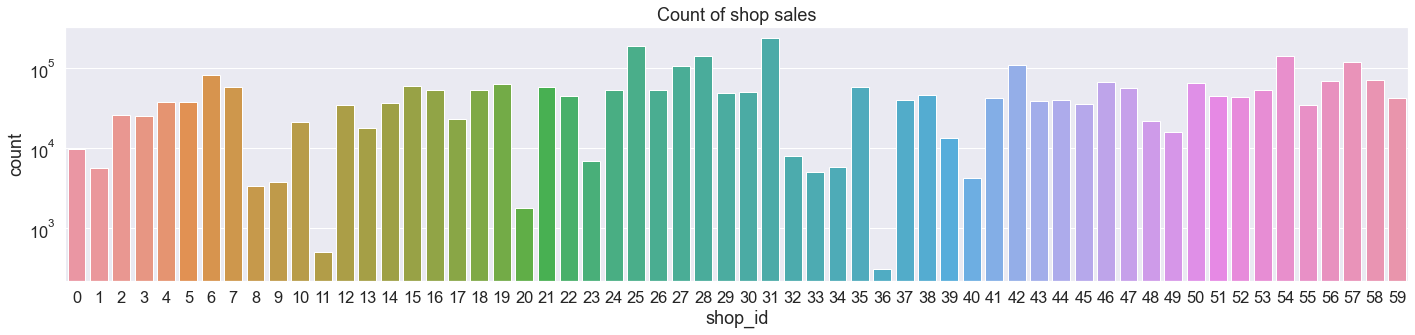

In [465]:
#plot barplot
sns.set(style = 'darkgrid', font_scale = 1.5)
plt.figure(figsize = (20, 5))
sns.barplot(data = shop_unique, x = 'shop_id', y = 'count')
plt.yscale('log')
plt.title('Count of shop sales')
plt.tight_layout()

In [449]:
#looking for unique item_id values
item_unique = pd.DataFrame(np.unique(train.item_id, return_counts = True)).T
item_unique.columns = ['item_id', 'count'] 
item_unique

,item_id,count
0,0,1
1,1,6
2,2,2
3,3,2
4,4,1
...,...,...
21802,22165,2
21803,22166,270
21804,22167,1114
21805,22168,6


Because the number of unique item_id is a lot (22170 entries), it is better to visualize the distribution of counts using a histogram.

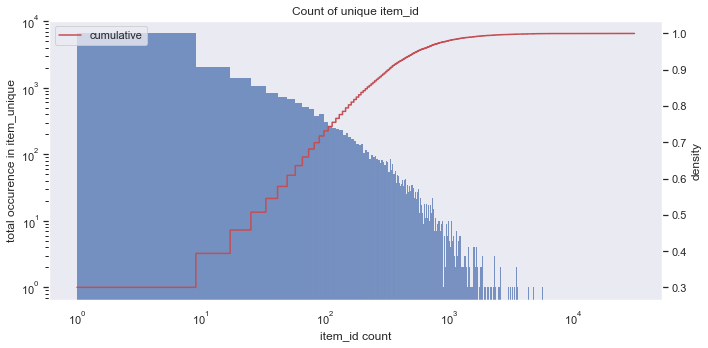

In [450]:
#plot
sns.set(style = 'dark')

fig, ax1 = plt.subplots(figsize = (10, 5))

ax2 = ax1.twinx()

sns.histplot(data = item_unique, x = 'count', ax = ax1)
sns.histplot(data = item_unique, x = 'count', element = 'step', cumulative=True, stat = 'density', fill = False, color = 'r', label = 'cumulative', ax = ax2)

ax1.set_ylabel('total occurence in item_unique')
ax1.set_xlabel('item_id count')
ax1.set_yscale('log')
ax1.set_xscale('log')

ax2.set_ylabel('density')
ax2.legend()

plt.title('Count of unique item_id')
plt.tight_layout()

What do we get from the plots?

1. **There are 60 shops in total**, labeled by shop_id from 0-59. From the distribution of counts of each shop throughout the train data, some has low counts which means that they sell much less than the rest. These are seen for shops 11, 20, and 36. For the rest of the shops, their counts are relatively the same (they sell items around equal amount of times).

2. From the distribution of item_id, we can see that **90%** of the items were sold **from 1 until around 300 times**. This *doesn't take into account how many of each item was sold per day*. Still, we can see that a small portion of the items were sold very frequently, exceeding 1000 times. These frequently sold items could be more important in predicting than the less frequent ones. 

### 1.1.3 Simple Statistics

Now, let's look at the simple statistics we can get from train data.

In [451]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


There are some interesting things to see here. 

Also, ignore mean, std, 25%, 50%, and 75% for data_block_num, shop_id, and item_id data. First of all, because date_block_num goes from 0 until 33 (it is just a category for months). Second, because shop_id and item_id are categorical data and those values would be meaningless.

1. **If we see item_price, we get -1.0 for the minimum value which is odd because prices shouldn't be negative**. This could be a typo.

2. **Looking at item_cnt_day, the minimum value is also negative**. This might imply two things, either negative item counts are typos or they are counts for returned items. 

3. There might be a connection between negative item_price and negative item_cnt_day. We need to look further whether this is true or not. The main idea is that **if this is true**, then **for every negative item_cnt_day, the item_price is also negative**.

4. **The range of item_price is large**, spanning from 0 (if not taking into account negative values) until 307980. Moreover, looking at the 25%, 50%, and 75% values, there is a big jump from 999.0 (75%) to 307980 (max). This might imply some outliers which we need to inspect.

5. **The large range is also seen for item_cnt_day**, spanning from 0 (if not taking into account negative values) until 2169. The jump between 75% and max values indicates there must be some items with more than 1000 sales per day and these can be considered as outliers too.

### 1.1.4 Distribution of unique item_price

Let's see the distribution of item_price!

In [452]:
#Get unique prices
price_unique = pd.DataFrame(np.unique(train.item_price, return_counts = True)).T
price_unique.columns = ['item_price', 'count'] 
price_unique

,item_price,count
0,-1.0000,1.0
1,0.0700,2.0
2,0.0875,1.0
3,0.0900,1.0
4,0.1000,2932.0
...,...,...
19988,42990.0000,4.0
19989,49782.0000,1.0
19990,50999.0000,1.0
19991,59200.0000,1.0


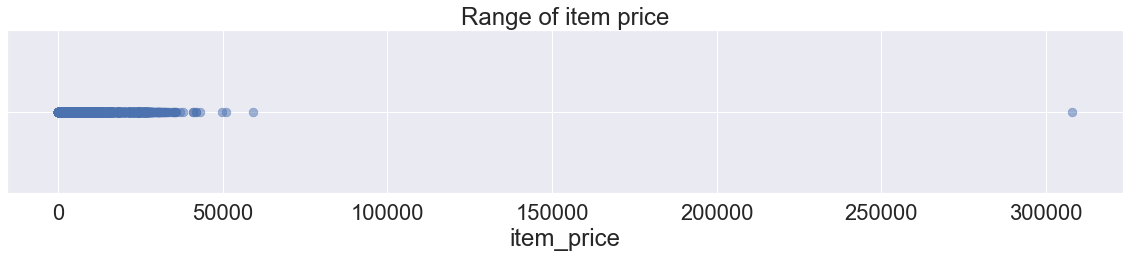

In [489]:
#plot all unique values
sns.set(style = 'darkgrid', font_scale = 2)

fig, ax = plt.subplots(1, 1, figsize=(20, 3))

plot1 = sns.scatterplot(x = price_unique.item_price, y = np.zeros_like(price_unique.item_price, int), s = 75, edgecolor = None, alpha = 0.5)
plot1.set_xlabel('item_price')
plot1.set_ylim((-0.01, 0.01))
plot1.set(yticklabels = [])
plot1.set_title('Range of item price')

plt.savefig('range_of_item_price.png', dpi = 300, bbox_inches = 'tight')
plt.show()

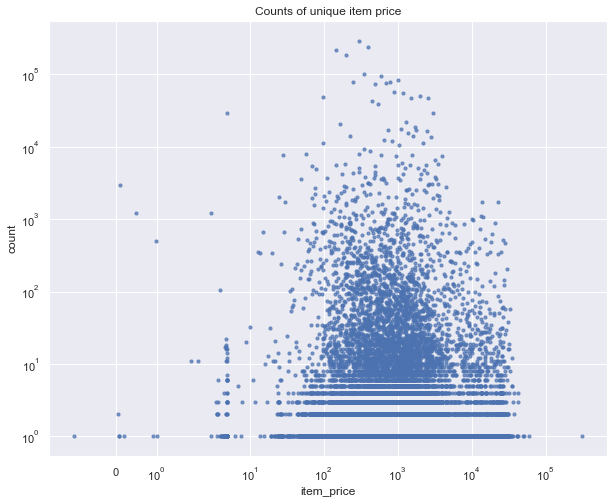

In [54]:
#plot the distribution
plt.figure(figsize = (10, 8))
plt.scatter(price_unique['item_price'], price_unique['count'], s = 10, alpha = 0.7)
plt.xscale('symlog')
plt.xlabel('item_price')
plt.ylabel('count')
plt.yscale('log')
plt.title('Counts of unique item price')
plt.show()

### 1.1.5 Distribution of unique item_cnt_day

Let's see the distribution of item_cnt_day!

In [459]:
#Get unique item_cnt_day
cnt_unique = pd.DataFrame(np.unique(train.item_cnt_day, return_counts = True)).T
cnt_unique.columns = ['item_cnt_day', 'count'] 
cnt_unique

,item_cnt_day,count
0,-22.0,1.0
1,-16.0,1.0
2,-9.0,1.0
3,-6.0,2.0
4,-5.0,4.0
...,...,...
193,624.0,1.0
194,637.0,1.0
195,669.0,1.0
196,1000.0,1.0


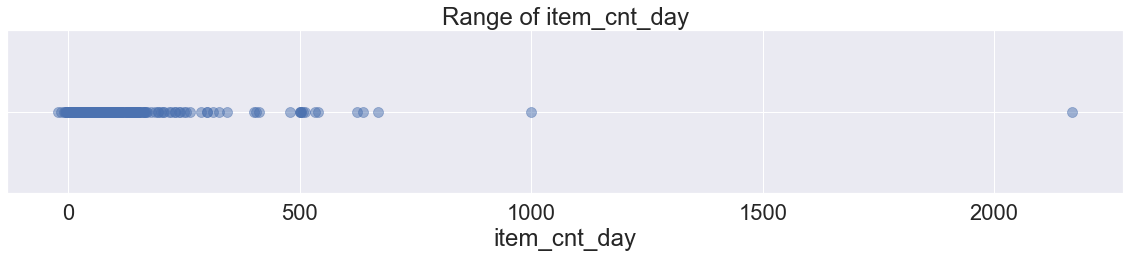

In [486]:
#plot all unique values
sns.set(style = 'darkgrid', font_scale = 2)

fig, ax = plt.subplots(1, 1, figsize=(20, 3))

plot2 = sns.scatterplot(x = cnt_unique.item_cnt_day, y = np.zeros_like(cnt_unique.item_cnt_day, int), s = 100, edgecolor = None, alpha = 0.5)
plot2.set(yticklabels = [])
plot2.set_xlabel('item_cnt_day')
plot2.set_ylim((-0.01, 0.01))
plot2.set_title('Range of item_cnt_day')

plt.savefig('range_of_item_cnt_day.png', dpi = 300, bbox_inches = 'tight')
plt.show()

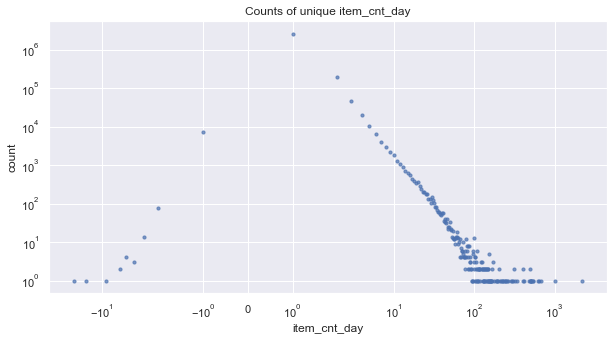

In [57]:
#plot the distribution
plt.figure(figsize = (10, 5))
plt.scatter(cnt_unique['item_cnt_day'], cnt_unique['count'], s = 10, alpha = 0.7)
plt.xscale('symlog')
plt.xlabel('item_cnt_day')
plt.ylabel('count')
plt.yscale('log')
plt.title('Counts of unique item_cnt_day')
plt.show()

What can we get from the plots?

1. **For item_price**, most of the values cluster between the minimal value and 100000. The outliers are then those above 100000. Or to be safe, **those above 300000 are considered outliers**. 
 

2. **There are very little negative values in item_price (if we see the counts)**. Dealing with them with, multiplying them by (-1) or getting rid of them completely, seems to be okay. We need to check the negative values' counts from the item_cnt_day column. 


3. **For item_cnt_day**, most of the values fall between the minimal value and 1000. So, it is safe to say that **those above 1000 are considered outliers.** 


4. **There are quite a lot of (-1) item_cnt_day counts in the dataset. But because a majority of them are positive values, we might safely ignore these negative values.** Still, are these negative values coupled with negative item_price?

To find out if for every negative item_price there is also a negative item_cnt_day, let's check for every negative item_price.

### 1.1.6 Looking at negative valued data

In [58]:
#change date dtype in train data
train['date'] = pd.to_datetime(train['date'], format = '%d.%m.%Y')

#separate month and year
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

In [59]:
#Mask for every negative item_price
item_neg_price = train[train['item_price'] < 0]

#Check
item_neg_price

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
484683,2013-05-15,4,32,2973,-1.0,1.0,5,2013


In [60]:
#Mask for every negative item_cnt_day
item_neg_cnt = train[train['item_cnt_day'] < 0]

#check
item_neg_cnt

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
2,2013-01-05,0,25,2552,899.0,-1.0,1,2013
148,2013-01-23,0,25,2321,999.0,-1.0,1,2013
175,2013-01-07,0,25,2199,1449.0,-1.0,1,2013
807,2013-01-02,0,25,2330,599.0,-1.0,1,2013
1041,2013-01-13,0,25,5034,1989.0,-1.0,1,2013
...,...,...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0,10,2015
2934462,2015-10-18,33,25,4896,6398.0,-1.0,10,2015
2935263,2015-10-05,33,25,10039,249.0,-1.0,10,2015
2935643,2015-10-16,33,25,7893,2990.0,-1.0,10,2015


It is clearly seen that for every negative item price, there is not a must for negative item_cnt_day. Moreover, the data which contains negative price is only 1, which means that we can ignore it as it is very insignificant in compare with the whole dataset.

For the negative item_cnt_day, there are 7356 entries which contain some sort of negative values. This is still way smaller in size in compare with the whole dataset. But there is something we'd like to see, and that is, within this small set, what is the distribution of the dates, shop_id, and item_id.

#### 1.1.6.1 Comparing for per month in each year

In [61]:
#count unique combinations of month and year
month_year_u = item_neg_cnt[['month', 'year']].value_counts().reset_index(name = 'count')
month_year_u

,month,year,count
0,1,2013,352
1,1,2014,340
2,12,2013,325
3,1,2015,323
4,12,2014,297
5,3,2013,294
6,2,2013,287
7,2,2014,280
8,8,2013,277
9,10,2013,264


In [62]:
#count unique year counts
year_u = item_neg_cnt[['year']].value_counts().reset_index(name = 'count')
year_u

,year,count
0,2013,3071
1,2014,2650
2,2015,1635


Text(0.5, 1.0, 'Count of negative item_cnt_day per month for each year')

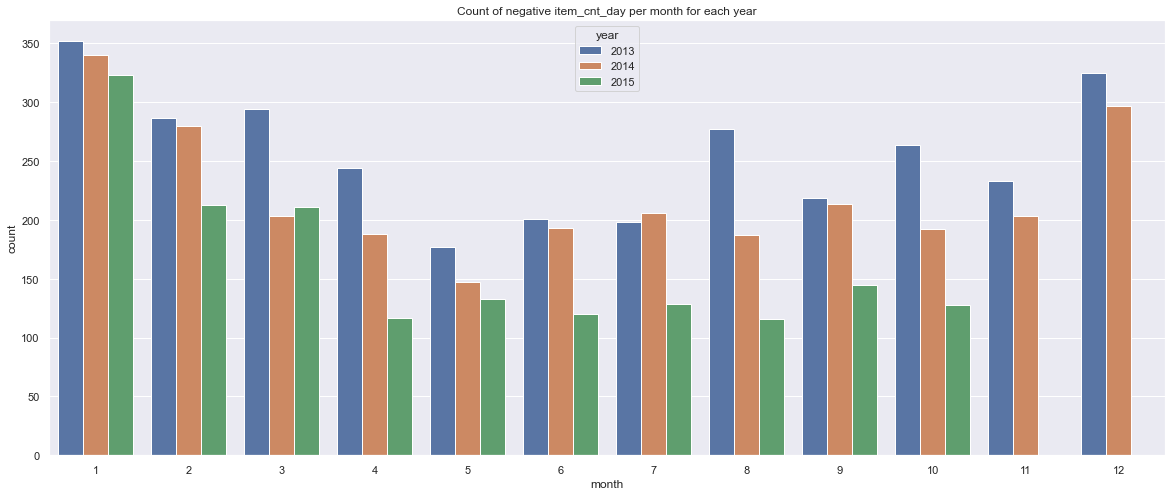

In [63]:
#plotting
sns.set(style = ('darkgrid'))
plt.figure(figsize = (20, 8))
sns.barplot(x = month_year_u['month'], y = month_year_u['count'], hue = month_year_u['year'])
plt.title('Count of negative item_cnt_day per month for each year')

Text(0.5, 1.0, 'Count of total vs negative item_cnt_day values in each year')

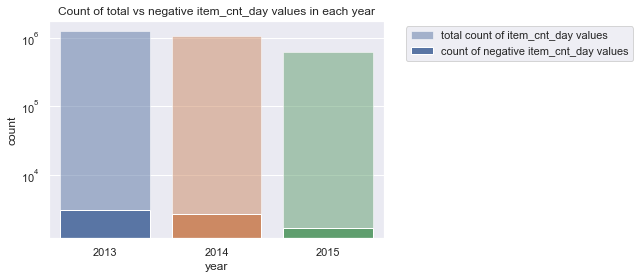

In [64]:
#plotting for count of negative item_cnt_day per year vs the total count of item_cnt_day for that year
s2 = sns.countplot(x = train['year'], alpha = 0.5, label = 'total count of item_cnt_day values')
s1 = sns.barplot(x = year_u['year'], y = year_u['count'], label = 'count of negative item_cnt_day values')
plt.yscale('log')
plt.legend(bbox_to_anchor = (1.05, 1))
plt.title('Count of total vs negative item_cnt_day values in each year')

In [65]:
#Calculate percentage of negative item_cnt_day count for each year
year_cnt = train[['year']].value_counts().reset_index(name = 'count')
year_u['percentage (%)'] = (year_u['count'] / year_cnt['count']) * 100
year_u

,year,count,percentage (%)
0,2013,3071,0.242276
1,2014,2650,0.250980
2,2015,1635,0.266971


#### 1.1.6.2 Comparing for unique shop_id in the item_neg_dataset

In [66]:
#Looking for unique shop_id in the item_neg_cnt dataset
neg_shop_u = pd.DataFrame(np.unique(item_neg_cnt['shop_id'], return_counts=True)).T
neg_shop_u.columns = ['shop_id', 'count']

print(neg_shop_u.head())
np.shape(neg_shop_u)

   shop_id  count
0        2     80
1        3    119
2        4    124
3        5     85
4        6    261


(54, 2)

In [67]:
#But before that, there are some shops without negative item_cnt_day values. Let's just only include those with negative values.
shop_unique_withneg = shop_unique.loc[shop_unique['shop_id'].isin(list(neg_shop_u['shop_id']))].reset_index(drop=True)
shop_unique_withneg

,shop_id,count
0,2,25991
1,3,25532
2,4,38242
3,5,38179
4,6,82663
5,7,58076
6,8,3412
7,9,3751
8,12,34694
9,14,36979


In [68]:
#count percentage of negative values over the total for each shop
neg_shop_u['percentage (%)'] = (neg_shop_u['count'] / shop_unique_withneg['count'])*100
neg_shop_u

,shop_id,count,percentage (%)
0,2,80,0.307799
1,3,119,0.466082
2,4,124,0.324251
3,5,85,0.222635
4,6,261,0.315740
5,7,99,0.170466
6,8,6,0.175850
7,9,8,0.213276
8,12,430,1.239407
9,14,120,0.324509


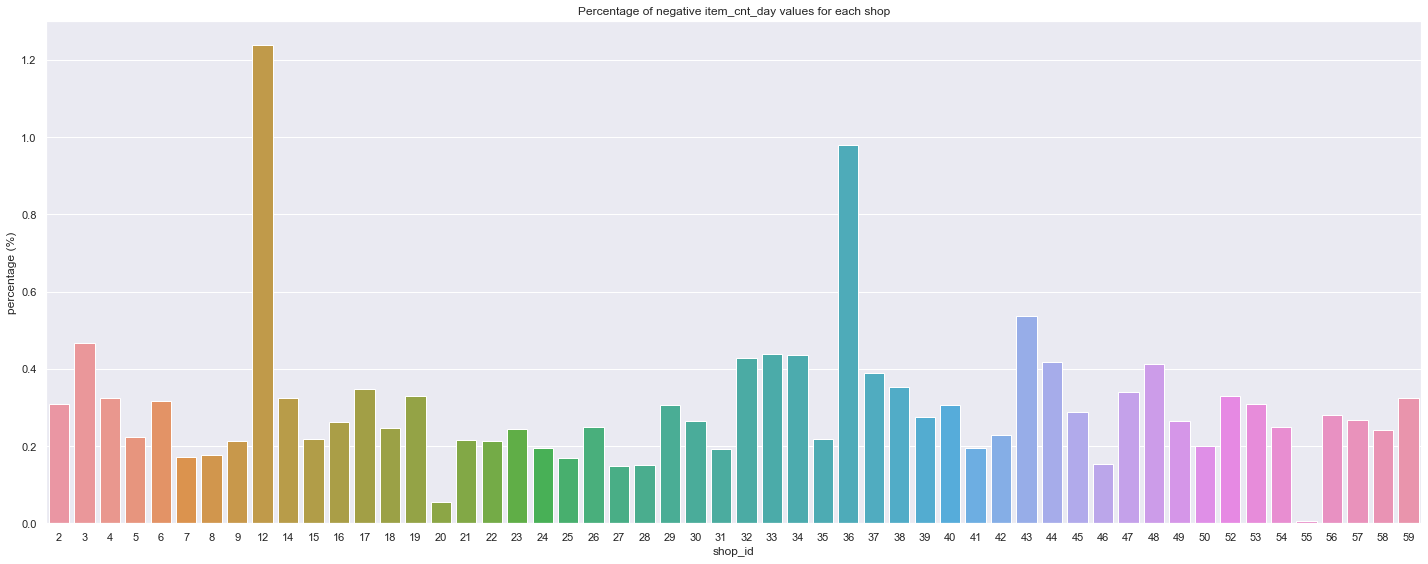

In [69]:
#plotting for shops

sns.set(style = 'darkgrid')
plt.figure(figsize = (20, 8))
sns.barplot(x = neg_shop_u['shop_id'], y = neg_shop_u['percentage (%)'])
plt.title('Percentage of negative item_cnt_day values for each shop')
plt.tight_layout()

#### 1.1.6.3 Counting for every unique item_id in the item_neg_cnt dataset

In [70]:
#Looking for unique item_id in the item_neg_cnt dataset
neg_item_u = pd.DataFrame(np.unique(item_neg_cnt['item_id'], return_counts=True)).T
neg_item_u.columns = ['item_id', 'count']

neg_item_u

,item_id,count
0,28,1
1,29,1
2,30,1
3,31,5
4,32,2
...,...,...
3506,22147,1
3507,22155,1
3508,22162,1
3509,22164,1


In [71]:
#To calculate the percentage of these negative values for each item_id, we need to look at item_id which has negative values first.
item_unique_withneg = item_unique.loc[item_unique['item_id'].isin(list(neg_item_u['item_id']))].reset_index(drop=True)
item_unique_withneg

,item_id,count
0,28,86
1,29,14
2,30,1383
3,31,1110
4,32,1884
...,...,...
3506,22147,63
3507,22155,75
3508,22162,560
3509,22164,408


In [72]:
#Calculating percentage
neg_item_u['percentage (%)'] = (neg_item_u['count'] / item_unique_withneg['count']) * 100
neg_item_u

,item_id,count,percentage (%)
0,28,1,1.162791
1,29,1,7.142857
2,30,1,0.072307
3,31,5,0.450450
4,32,2,0.106157
...,...,...,...
3506,22147,1,1.587302
3507,22155,1,1.333333
3508,22162,1,0.178571
3509,22164,1,0.245098


Text(0.5, 1.0, 'Percentage of negative item_cnt_day values for each item')

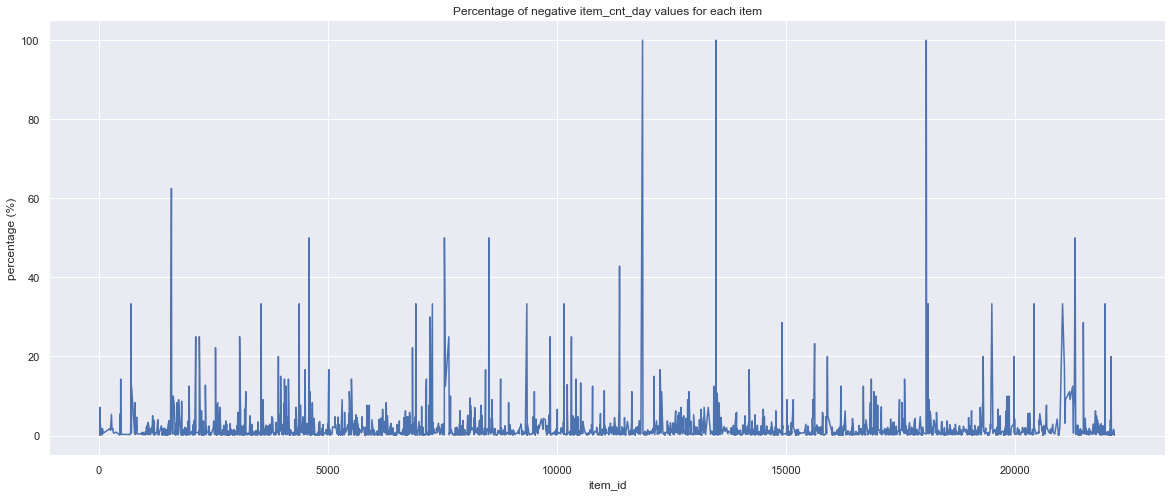

In [73]:
#plotting
sns.set(style = 'darkgrid')
plt.figure(figsize = (20, 8))
sns.lineplot(x = neg_item_u['item_id'], y = neg_item_u['percentage (%)'])
plt.title('Percentage of negative item_cnt_day values for each item')

In [74]:
#list of item_id with more than 50% percentage of negative item_cnt_day values
neg_item_u_50 = neg_item_u[neg_item_u['percentage (%)'] > 50]
neg_item_u_50

,item_id,count,percentage (%)
180,1590,5,62.5
2001,11871,1,100.0
2234,13474,1,100.0
2923,18062,1,100.0


<AxesSubplot:xlabel='percentage (%)', ylabel='Count'>

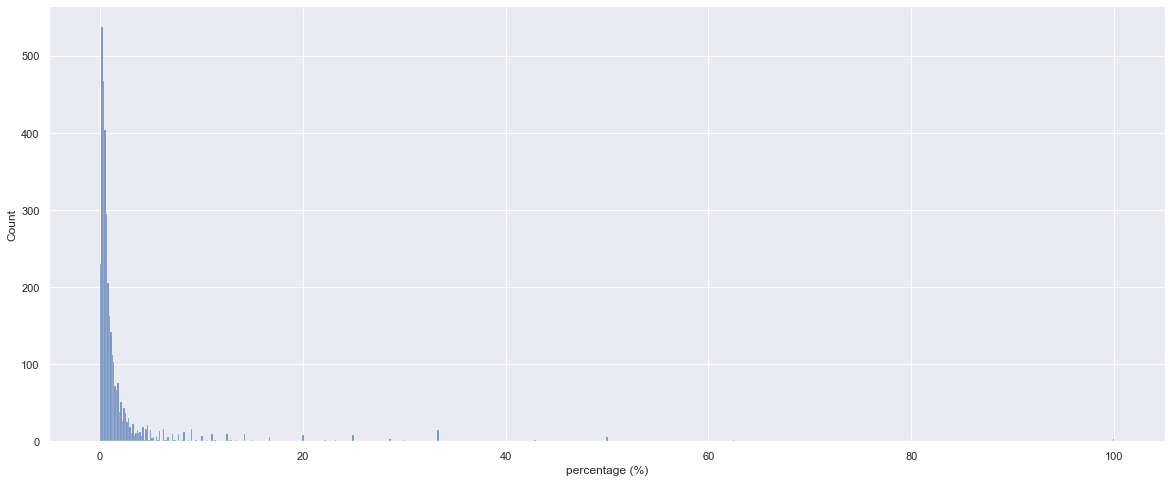

In [75]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (20, 8))
sns.histplot(x = neg_item_u['percentage (%)'])

What can we see from the plots?

1. It seems these negative values appear in all years (2013-2015) in every month (because the data stops at October 2015, so there is no negative value data for November and December 2015). 


2. A lot of these negative values appear in January and the least in May (but this is not our concern for now).


3. If looking at the table year_u, we can see that year 2013 has the most negative values in item_cnt_day. But seeing from the plot of total items in the year 2013 itself (plot *Count of total vs negative item_cnt_day values in each year*), the count is far less and so, *it is safe to ignore them*. However, because the plot's **y scale is in log**, we need to see from the tabular data of the precentage of negative values within each year to get a better view. Their values turn out to be very low (the biggest is 0.27%). But how about their relation with shop_id? Because remember, there are shops with low counts of sales.


4. Seeing for the plot *Percentage of negative item_cnt_day values for each shop*, all of them count up to no more than 1.3% for each shop. Now, how about in relation with each item_id?


5. From the plot *Percentage of negative item_cnt_day values for each item*, 4 items have more than 50% of their item_cnt_day values comprised of negative values. Still, the majority has percentages less than 10%. So, **it is safe to get rid of negative values. To achieve this, we set them into 0.**

### 1.1.7 Cleaning up Train Set

In [76]:
#remove negative values
#this line removes negative prices by selecting only positive prices to be kept in the dataset and reset dataset's indexes
train = train[train.item_price > 0].reset_index(drop = True)

#this line selects all negative and 0 item_cnt_day values and sets them to 0.
train.loc[train.item_cnt_day < 1, "item_cnt_day"] = 0

#this line drops the month and year column as we are going to use date_block_num instead of them.
train = train.drop(['month', 'year'], axis = 1)

In [77]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,0.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935843,2015-10-10,33,25,7409,299.00,1.0
2935844,2015-10-09,33,25,7460,299.00,1.0
2935845,2015-10-14,33,25,7459,349.00,1.0
2935846,2015-10-22,33,25,7440,299.00,1.0


## 1.2 Looking at the test set

In [4]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
np.shape(test)

(214200, 3)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,214200.0,107099.500000,61834.358168,0.0,53549.75,107099.5,160649.25,214199.0
shop_id,214200.0,31.642857,17.561933,2.0,16.00,34.5,47.00,59.0
item_id,214200.0,11019.398627,6252.644590,30.0,5381.50,11203.0,16071.50,22167.0


From the overview of the test set, we can observe some things.

1. There are 3 columns, ID, shop_id, and item_id. ID is the id of the shop-item sale pair.


2. From the minimum value of shop_id, we can see that **there are some shop_id in the train set which are not in the test set**. We need to investigate this further.


3. **There are also some item_id which are present in the train set but have gone missing in the test set**, just by looking at the minimum value of item_id. We also need to investigate this further.

In [9]:
good_sales = test.merge(train, on=['item_id','shop_id'], how='left').dropna()  
good_pairs = test[test['ID'].isin(good_sales['ID'])]   #so for these test sample we have training data
no_data_items = test[~(test['item_id'].isin(train['item_id']))]   #these items are not in the training set

print('1. Number of good pairs:', len(good_pairs))
print('2. Only Item_id Info:', len(test)-len(no_data_items)-len(good_pairs))  #for these the item is in the training set but the item/shop combination is not
print('3. No Data Items:', len(no_data_items))

1. Number of good pairs: 111404
2. Only Item_id Info: 87550
3. No Data Items: 15246


The first group corresponds to item-shop pairs which are
present in the training set and as a result we have a sales history of them. This accounts for 52%
of the total test set. The second group are items which are present in the training set, however the
item-shop pair does not exist in the training set. 40% of the test set belongs to this group. Lastly,
the remaining 8% of items have no sales history at all given their absence from the training se

## 1.3 Looking at the shop set

### 1.3.1 Overview

In [86]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [87]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [88]:
np.shape(shops)

(60, 2)

From this dataset, we can pinpoint a couple of things.

1. The columns are comprised of shop_name and shop_id. However, looking at the shop_name values, there might be something that we can extract from there to add our information.


2. A total of 60 shops are listed, each with its shop_id.


3. Intuitively, there might be duplicates from the shop_name and this needs to be checked out. 

In [89]:
#Checking for duplicates
shops.duplicated().sum()

0

There seems to be no duplicates. Let's see from the whole dataset.

In [90]:
shops.shop_name

0                       !Якутск Орджоникидзе, 56 фран
1                       !Якутск ТЦ "Центральный" фран
2                                    Адыгея ТЦ "Мега"
3                      Балашиха ТРК "Октябрь-Киномир"
4                            Волжский ТЦ "Волга Молл"
5                              Вологда ТРЦ "Мармелад"
6                          Воронеж (Плехановская, 13)
7                              Воронеж ТРЦ "Максимир"
8                        Воронеж ТРЦ Сити-Парк "Град"
9                                   Выездная Торговля
10                         Жуковский ул. Чкалова 39м?
11                         Жуковский ул. Чкалова 39м²
12                                Интернет-магазин ЧС
13                                Казань ТЦ "Бехетле"
14                            Казань ТЦ "ПаркХаус" II
15                               Калуга ТРЦ "XXI век"
16                                   Коломна ТЦ "Рио"
17                      Красноярск ТЦ "Взлетка Плаза"
18                          

We can see that some shop_id have similar names. These shops need to be located so that their duplicated shop_id can be changed to merge their sales counts. But how to be sure if they are duplicates? We need to translate some of them to get the idea of what these names mean.

Translating shop_name of shop_id 0, 1, 2, 3, 4 (using Google translate) give us:
1. Yakutsk Ordzhonikidze, 56 francs,
2. Yakutsk shopping center "Central" franc,
3. Adygea shopping center "Mega",
4. Balashikha SEC "October-Kinomir", and
5. Volzhsky shopping center "Volga Mall".

From here, we can see that:
- the first part is the **city**,
- the second part is the **type of shop**, and
- the third part (and fourth, like shop_id 0) is the **name(s) of the shop**.

The shops which have similar names ((near) identical for the first, second, and third part of their names) are:
1. !Якутск Орджоникидзе, 56 фран and Якутск Орджоникидзе, 56 (shop_id 0 and 57),
2. !Якутск ТЦ "Центральный" фран and Якутск ТЦ "Центральный" (shop_id 1 and 58), and
3. Жуковский ул. Чкалова 39м? and Жуковский ул. Чкалова 39м² (shop_id 10 and 11).

Some notes:
1. shop_id 23 and 24 have similar names, but their names include information about the location of each shop (one in pavilion A2, one in pavilion K7, both in the same shopping center (ТК is a type of shopping center, translated using Google translate)).

Therefore, we need to handle these duplicates in the train and test set by changing shop_id 0 into 57, shop_id 1 into 58, and shop_id 10 into 11. This way, their item sales are combined as we assume they are the same shop.

In [91]:
#combining shops by handling duplicates in shop_name

train.loc[train.shop_id == 0, 'shop_id'] = 57 
test.loc[test.shop_id == 0, 'shop_id'] = 57 

train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58

train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11 

### 1.3.2 Separating the names and categories of each shop

To get a good idea of the types/categories of each shop, we need to split their names based on the city-category-name(-name) pattern, each is separated with a white space.

There is an inconsistency in shop_id 46. If we translate it, we get 

Сергиев Посад ТЦ "7Я" : Sergiev Posad shopping center "7YA".

Sergiev Posad is the name of the city, and if we stick to the pattern, this might be counted as city *and* category. However, from the translation, we know that the category is ТЦ (shopping center). We need to combine the city name to proceed.

In [92]:
shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', "shop_name"] = 'СергиевПосад ТЦ "7Я"'

In [93]:
#splitting shop_name into city, category, and name(s)
shops["city"] = shops.shop_name.str.split(" ").map(lambda x: x[0])
shops["category"] = shops.shop_name.str.split(" ").map(lambda x: x[1])

In [94]:
shops

,shop_name,shop_id,city,category
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,"Орджоникидзе,"
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,ТРЦ
6,"Воронеж (Плехановская, 13)",6,Воронеж,"(Плехановская,"
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,ТРЦ
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,ТРЦ
9,Выездная Торговля,9,Выездная,Торговля


Again, we find inconsistencies in using special characters like !, (, ., and , on the city and category names. We need to get rid of them too.

In [95]:
shops.loc[shops.city == "!Якутск", "city"] = "Якутск"
shops.loc[shops.category == "(Плехановская,", "category"] = "Плехановская"
shops.loc[shops.category == "Орджоникидзе,", "category"] = "Орджоникидзе"
shops.loc[shops.category == "ул.", "category"] = "ул"
shops.loc[shops.category == '"Распродажа"', "category"] = "Распродажа"

Now that we have the city and category, let's see the counts of each unique value.

Text(0.5, 1.0, 'Count of unique city names')

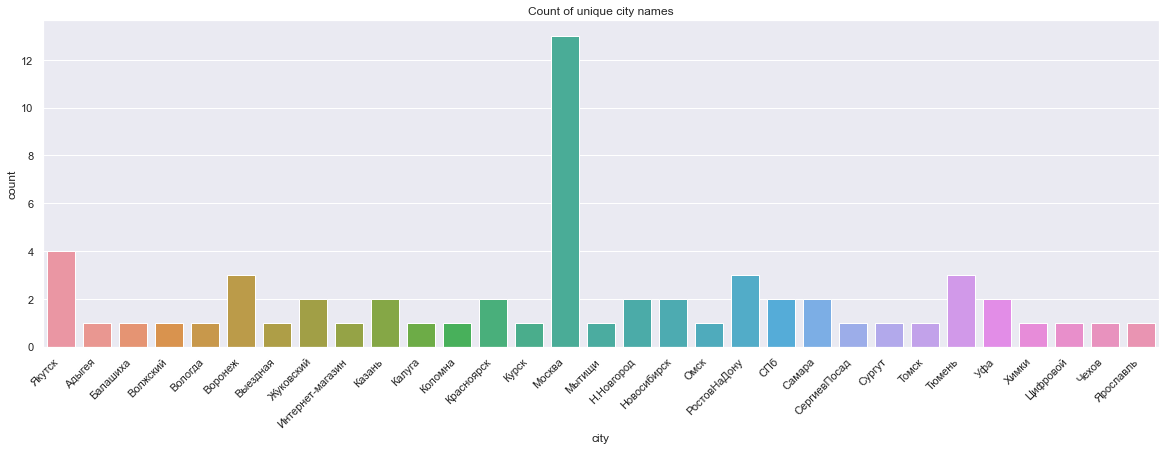

In [96]:
#see unique city counts using plot
sns.set(style = ('darkgrid'))
fig, ax = plt.subplots(figsize = (20, 6))
sns.countplot(x = shops.city, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_title('Count of unique city names')

Text(0.5, 1.0, 'Count of unique categories')

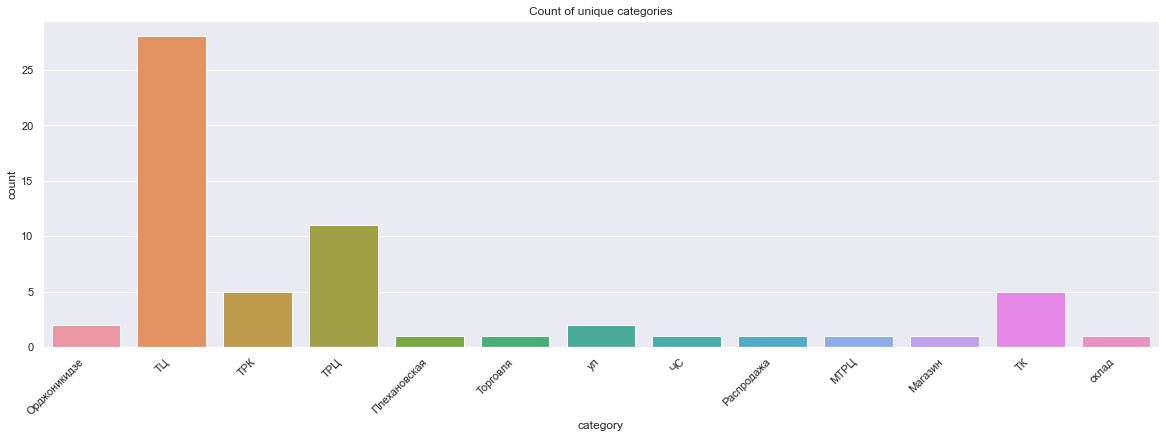

In [97]:
#see unique category counts using plot
sns.set(style = ('darkgrid'))
fig, ax = plt.subplots(figsize = (20, 6))
sns.countplot(x = shops.category, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_title('Count of unique categories')

We observe that a lot of categories do not have counts above 5. Therefore, we can retain categories which have 5 counts at minimum and group the rest. From the plot we will get 5 categories.

In [98]:
category = []
for cat in shops.category.unique():
    if len(shops[shops.category == cat]) >= 5: #if number of shops with a certain category contained in cat is equal to or larger than 5
        category.append(cat) #append that category into the category list as its own (not included in the 'other' section)
        pass
    pass

shops.category = shops.category.apply(lambda x: x if (x in category) else "other") 
#lambda function: if category[x] in shops dataset is in the category list, state as it is. Otherwise, change into 'other'

### 1.3.3 Encoding City and Category Values

We need to encode each categorical data (category and city) with a unique number. This needs to be done so that we can model the full dataset at the end as it is easier to model numbers instead of words. To do this, we'll use LabelEncoder from sklearn.preprocessing.

In [99]:
from sklearn.preprocessing import LabelEncoder

shops['shop_category'] = LabelEncoder().fit_transform(shops.category) #inside the () is the category to be encoded
shops['shop_city'] = LabelEncoder().fit_transform(shops.city) #this too
shops = shops[['shop_id', 'category', 'city', 'shop_category', 'shop_city']] #resetting everything inside the 'shops' df (dropping the city and category column with string values)

In [100]:
shops

,shop_id,category,city,shop_category,shop_city
0,0,other,Якутск,0,29
1,1,ТЦ,Якутск,4,29
2,2,ТЦ,Адыгея,4,0
3,3,ТРК,Балашиха,2,1
4,4,ТЦ,Волжский,4,2
5,5,ТРЦ,Вологда,3,3
6,6,other,Воронеж,0,4
7,7,ТРЦ,Воронеж,3,4
8,8,ТРЦ,Воронеж,3,4
9,9,other,Выездная,0,5


## 1.4 Looking at the Cats Set

### 1.4.1 Overview

In [101]:
cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [102]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [103]:
np.shape(cats)

(84, 2)

The cats dataset has 2 columns, one is listing item_category_name and the other is the item_category_id. Let's (again) check for duplicates.

In [104]:
shops.duplicated().sum()

0

No duplicates detected. Now let us see what each part of the name really is, via translation.

In [105]:
cats.item_category_name

0       PC - Гарнитуры/Наушники
1              Аксессуары - PS2
2              Аксессуары - PS3
3              Аксессуары - PS4
4              Аксессуары - PSP
                ...            
79                    Служебные
80           Служебные - Билеты
81      Чистые носители (шпиль)
82    Чистые носители (штучные)
83             Элементы питания
Name: item_category_name, Length: 84, dtype: object

Translating number 0, 1, 80, 82, and 83 gives us:

1. PC - headsets/headphones
2. Accessories - PS2
3. Service - tickets
4. Blank media (piece)
5. Batteries

This gives information that the first part of the name is the **category** of the item, the second part is the **subtype** of the item. 

In [106]:
#Splitting category into separate column
cats['type_code'] = cats.item_category_name.apply(lambda x: x.split(" ")[0]).astype(str) #splitting and using the first element only

In [107]:
#looking unique type_codes
type_code_u = pd.DataFrame(np.unique(cats['type_code']))
type_code_u.columns = ['type_code']
type_code_u

,type_code
0,PC
1,Аксессуары
2,Билеты
3,Доставка
4,Игровые
5,Игры
6,Карты
7,Кино
8,Книги
9,Музыка


If we translate all type_codes, we'll get PC, accessories, tickets, delivery, gaming, games, cards, movie, books, music, present, programs, service, pure, and elements. Because gaming, acessories, and games can be considered as one category (accessories are given to items which are categorized as game acessories), we can merge them together by changing the labels into games instead. 

In [108]:
cats.loc[(cats.type_code == 'Игровые')|(cats.type_code == 'Аксессуары'), 'type_code'] = 'Игры'

Let's see the counts of all type_codes.

Text(0.5, 1.0, 'Count of type_codes')

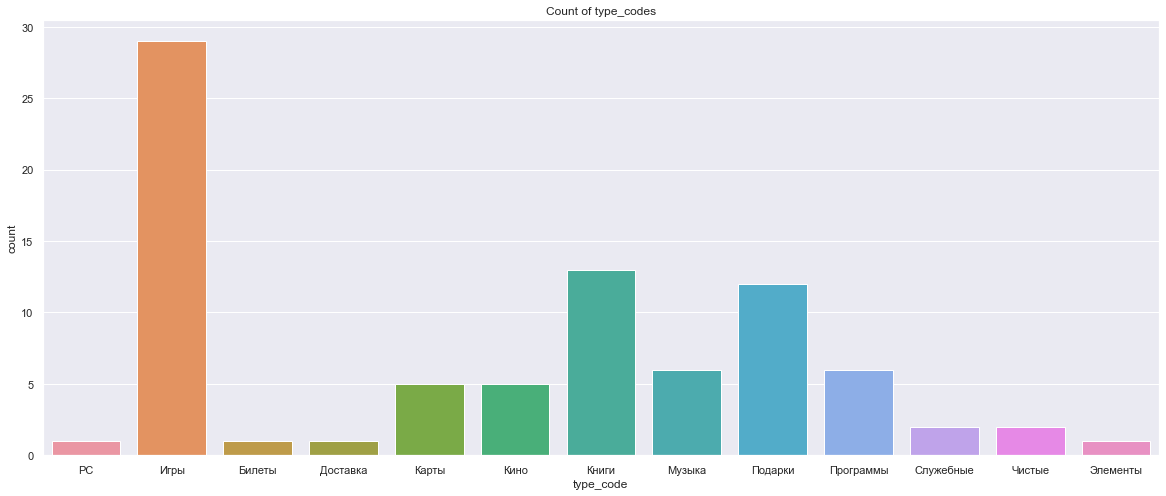

In [109]:
sns.set(style = ('darkgrid'))
plt.figure(figsize = (20, 8))
sns.countplot(x = cats.type_code)
plt.title('Count of type_codes')

We can see that several type_codes have values less than 5. We can group them together.

In [110]:
type_ = []
for cat in cats.type_code.unique():
    if len(cats[cats.type_code == cat]) >= 5: 
        type_.append(cat)
cats.type_code = cats.type_code.apply(lambda x: x if (x in type_) else 'others')

We still need to split the subtype from the item_category_name value.

In [111]:
#splitting to obtain subtype
cats["split"] = cats.item_category_name.apply(lambda x: x.split("-"))
cats.split

0      [PC ,  Гарнитуры/Наушники]
1             [Аксессуары ,  PS2]
2             [Аксессуары ,  PS3]
3             [Аксессуары ,  PS4]
4             [Аксессуары ,  PSP]
                 ...             
79                    [Служебные]
80          [Служебные ,  Билеты]
81      [Чистые носители (шпиль)]
82    [Чистые носители (штучные)]
83             [Элементы питания]
Name: split, Length: 84, dtype: object

Interestingly, some items only have either type_code or subtype. That means the subtype is also the only element in that name (see for instance index 79, it only has one information; this becomes the type_code *and* the subtype). To deal with this, we need to build a condition:

1. if there are two elements after splitting, the second element is the subtype, or
2. if there is one element after splitting, it is the subtype.

In [112]:
cats["subtype"] = cats.split.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

In [113]:
#Looking at unique entries of subtypes
print(cats.subtype.unique())
print('Number of unique subtypes: ', len(cats.subtype.unique()))

['Гарнитуры/Наушники' 'PS2' 'PS3' 'PS4' 'PSP' 'PSVita' 'XBOX 360'
 'XBOX ONE' 'Билеты (Цифра)' 'Доставка товара' 'Прочие'
 'Аксессуары для игр' 'Цифра' 'Дополнительные издания'
 'Коллекционные издания' 'Стандартные издания'
 'Карты оплаты (Кино, Музыка, Игры)' 'Live!' 'Live! (Цифра)' 'PSN'
 'Windows (Цифра)' 'Blu' 'DVD' 'Коллекционное' 'Артбуки, энциклопедии'
 'Аудиокниги' 'Аудиокниги (Цифра)' 'Аудиокниги 1С' 'Бизнес литература'
 'Комиксы, манга' 'Компьютерная литература' 'Методические материалы 1С'
 'Открытки' 'Познавательная литература' 'Путеводители'
 'Художественная литература' 'CD локального производства'
 'CD фирменного производства' 'MP3' 'Винил' 'Музыкальное видео'
 'Подарочные издания' 'Атрибутика' 'Гаджеты, роботы, спорт'
 'Мягкие игрушки' 'Настольные игры' 'Настольные игры (компактные)'
 'Открытки, наклейки' 'Развитие' 'Сертификаты, услуги' 'Сувениры'
 'Сувениры (в навеску)' 'Сумки, Альбомы, Коврики д/мыши' 'Фигурки'
 '1С:Предприятие 8' 'MAC (Цифра)' 'Для дома и офиса'
 'Для

Let's see the distribution again.

Text(0.5, 1.0, 'Count of Subtypes')

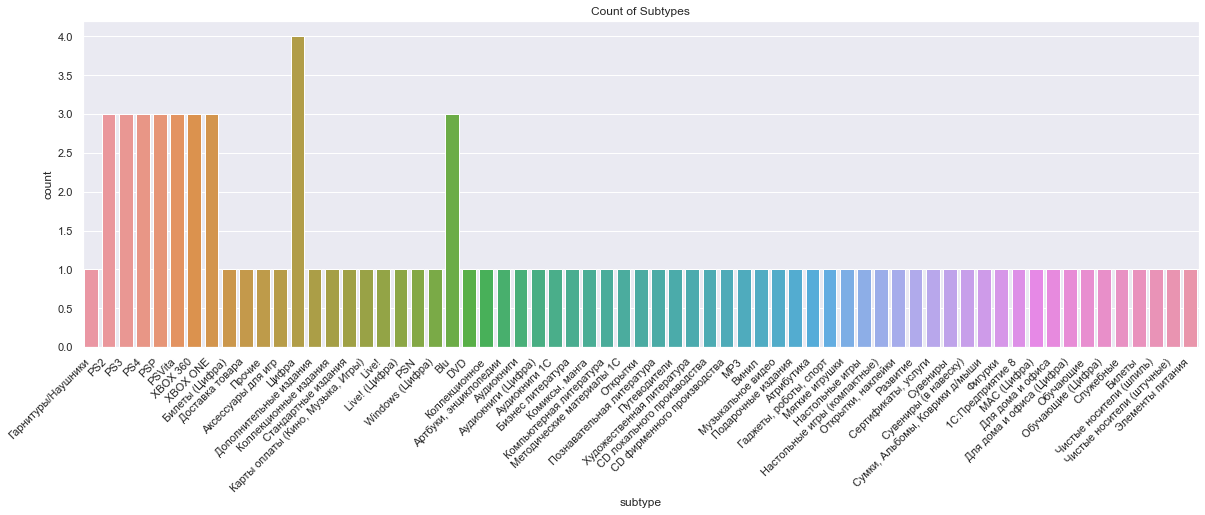

In [114]:
sns.set(style = ('darkgrid'))
fig, ax = plt.subplots(figsize = (20, 6))
sns.countplot(x = cats.subtype, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_title('Count of Subtypes')

A lot of them are unique to themselves and they may be under various type_codes (so, for a single type_code there can be numerous subtypes). Therefore, there is no need to group these low-count subtypes. 

### 1.4.2 Encoding type_code and subtype

In [115]:
cats['type_id'] = LabelEncoder().fit_transform(cats.type_code) #inside the () is the category to be encoded
cats['subtype_id'] = LabelEncoder().fit_transform(cats.subtype) #this too
cats = cats[['item_category_id', 'type_code', 'subtype', 'type_id', 'subtype_id']] 

In [116]:
cats.head()

,item_category_id,type_code,subtype,type_id,subtype_id
0,0,others,Гарнитуры/Наушники,0,29
1,1,Игры,PS2,1,9
2,2,Игры,PS3,1,10
3,3,Игры,PS4,1,11
4,4,Игры,PSP,1,13


## 1.5 Looking at Items Dataset

### 1.5.1 Overview

In [117]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [118]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [119]:
np.shape(items)

(22170, 3)

Similar steps are going to be done also for this dataset. From looking at the dataset, we see 3 columns. The first one is the item_name which (also) might contain additional information about the item, the second is item_id, the third one is item_category_id. 

Even from a glance, the item_name seems to be messy. Let's see a bit more of them.

In [120]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


Here are the 'messiness' whithin the item_name column.

1. Some entries are written in full captials.
2. Some entries are written in small letters.
3. There are special characters.

These need to be standardized into one style in order to proceed. But first, let's split the names by the "[" and '(' characters.

In [121]:
#split item names by first [ or (
items["name1"], items["name2"] = items.item_name.str.split("[", 1).str
items["name1"], items["name3"] = items.item_name.str.split("(", 1).str

C:\Users\Hobba\AppData\Local\Temp\ipykernel_6452\2725570400.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  items["name1"], items["name2"] = items.item_name.str.split("[", 1).str
C:\Users\Hobba\AppData\Local\Temp\ipykernel_6452\2725570400.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  items["name1"], items["name3"] = items.item_name.str.split("(", 1).str


Let's deal also with the special characters.

In [122]:
#replace special characters and turn to lower case
items["name2"] = items.name2.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()
items["name3"] = items.name3.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()

C:\Users\Hobba\AppData\Local\Temp\ipykernel_6452\2352434424.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  items["name2"] = items.name2.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()
C:\Users\Hobba\AppData\Local\Temp\ipykernel_6452\2352434424.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  items["name3"] = items.name3.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()


In [123]:
items.head()

,item_name,item_id,item_category_id,name1,name2,name3
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ,NaN,пласт d
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,!ABBYY FineReader 12 Professional Edition Full...,pc цифровая версия,NaN
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,***В ЛУЧАХ СЛАВЫ,NaN,unv d
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,***ГОЛУБАЯ ВОЛНА,NaN,univ d
4,***КОРОБКА (СТЕКЛО) D,4,40,***КОРОБКА,NaN,стекло d


Some name values are written as NaN. Just fill this NaN values with 0.

In [124]:
items = items.fillna('0') #this is string 0

Now, to deal with all the messiness happening, let's define a function to standardize them all.

In [125]:
import re
def name_correction(x):
    x = x.lower() # all letters lower case
    x = x.partition('[')[0] # partition by square brackets
    x = x.partition('(')[0] # partition by curly brackets
    x = re.sub('[^A-Za-z0-9А-Яа-я]+', ' ', x) # remove special characters
    x = x.replace('  ', ' ') # replace double spaces with single spaces
    x = x.strip() # remove leading and trailing white space
    return x

In [126]:
#applying correction
items["item_name"] = items["item_name"].apply(lambda x: name_correction(x))

In [127]:
items

,item_name,item_id,item_category_id,name1,name2,name3
0,во власти наваждения,0,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ,0,пласт d
1,abbyy finereader 12 professional edition full,1,76,!ABBYY FineReader 12 Professional Edition Full...,pc цифровая версия,0
2,в лучах славы,2,40,***В ЛУЧАХ СЛАВЫ,0,unv d
3,голубая волна,3,40,***ГОЛУБАЯ ВОЛНА,0,univ d
4,коробка,4,40,***КОРОБКА,0,стекло d
...,...,...,...,...,...,...
22165,ядерный титбит 2,22165,31,"Ядерный титбит 2 [PC, Цифровая версия]",pc цифровая версия,0
22166,язык запросов 1с предприятия,22166,54,Язык запросов 1С:Предприятия [Цифровая версия],цифровая версия,0
22167,язык запросов 1с предприятия 8,22167,49,Язык запросов 1С:Предприятия 8,0,cd хрусталева е ю
22168,яйцо для little inu,22168,62,Яйцо для Little Inu,0,0


In [128]:
#return all characters except the last if name2 is not "0" - the closing bracket
items.name2 = items.name2.apply(lambda x: x[:-1] if x !="0" else "0")
items

,item_name,item_id,item_category_id,name1,name2,name3
0,во власти наваждения,0,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ,0,пласт d
1,abbyy finereader 12 professional edition full,1,76,!ABBYY FineReader 12 Professional Edition Full...,pc цифровая версия,0
2,в лучах славы,2,40,***В ЛУЧАХ СЛАВЫ,0,unv d
3,голубая волна,3,40,***ГОЛУБАЯ ВОЛНА,0,univ d
4,коробка,4,40,***КОРОБКА,0,стекло d
...,...,...,...,...,...,...
22165,ядерный титбит 2,22165,31,"Ядерный титбит 2 [PC, Цифровая версия]",pc цифровая версия,0
22166,язык запросов 1с предприятия,22166,54,Язык запросов 1С:Предприятия [Цифровая версия],цифровая версия,0
22167,язык запросов 1с предприятия 8,22167,49,Язык запросов 1С:Предприятия 8,0,cd хрусталева е ю
22168,яйцо для little inu,22168,62,Яйцо для Little Inu,0,0


A bit more cleaning because each name2 carries information about type.

In [129]:
items["type"] = items.name2.apply(lambda x: x[0:8] if x.split(" ")[0] == "xbox" else x.split(" ")[0])
items.loc[(items.type == "x360")|(items.type == "xbox360")|(items.type == "xbox 360") ,"type"] = "xbox 360"
items.loc[items.type == "", "type"] = "mac"
items.type = items.type.apply( lambda x: x.replace(" ", ""))
items.loc[(items.type == 'pc' )| (items.type == 'pс')|(items.type == "pc"), "type"] = "pc"
items.loc[items.type == 'рs3' , "type"] = "ps3"

In [130]:
group_sum = items.groupby(["type"]).agg({"item_id": "count"}) 
#the above line is to make a list of "types" with added column with "item_id" title and the values are the total count of item_id's within that type
group_sum = group_sum.reset_index()
drop_cols = []

In [131]:
group_sum

,type,item_id
0,0,17661
1,5c5,1
2,5c7,2
3,5f4,1
4,6dv,1
5,6jv,1
6,6l6,1
7,android,3
8,hm3,1
9,j72,4


In [132]:
for cat in group_sum.type.unique():
    if group_sum.loc[(group_sum.type == cat), "item_id"].values[0] <40:
        drop_cols.append(cat)
items.name2 = items.name2.apply( lambda x: "other" if (x in drop_cols) else x )
items = items.drop(["type"], axis = 1)

In [133]:
items

,item_name,item_id,item_category_id,name1,name2,name3
0,во власти наваждения,0,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ,0,пласт d
1,abbyy finereader 12 professional edition full,1,76,!ABBYY FineReader 12 Professional Edition Full...,pc цифровая версия,0
2,в лучах славы,2,40,***В ЛУЧАХ СЛАВЫ,0,unv d
3,голубая волна,3,40,***ГОЛУБАЯ ВОЛНА,0,univ d
4,коробка,4,40,***КОРОБКА,0,стекло d
...,...,...,...,...,...,...
22165,ядерный титбит 2,22165,31,"Ядерный титбит 2 [PC, Цифровая версия]",pc цифровая версия,0
22166,язык запросов 1с предприятия,22166,54,Язык запросов 1С:Предприятия [Цифровая версия],цифровая версия,0
22167,язык запросов 1с предприятия 8,22167,49,Язык запросов 1С:Предприятия 8,0,cd хрусталева е ю
22168,яйцо для little inu,22168,62,Яйцо для Little Inu,0,0


### 1.5.2 Encoding

Again, we'll encode the name2 and name3 columns so that they can be used in the modelling.

In [134]:
items['name2'] = LabelEncoder().fit_transform(items['name2'])
items['name3'] = LabelEncoder().fit_transform(items['name3'])

items.drop(["item_name", "name1"],axis = 1, inplace= True)
items.head()

,item_id,item_category_id,name2,name3
0,0,40,4,1331
1,1,76,64,42
2,2,40,4,1011
3,3,40,4,1010
4,4,40,4,1572


## 1.6 Adding Revenue to Train Data

We're interested also in how the revenue behaves. So, we calculate the revenue for each item sale and input them into train data.

In [140]:
train['revenue'] = train.item_price * train.item_cnt_day

## 1.7 Creating Matrix containing Cleaned Data
Now that we have cleaned data, we're going to make a matrix which contains all of them. But, for the purpose of modelling, the matrix will only include numeric values.

### 1.7.1 Building base matrix

In [141]:
#Checking column names
print(train.columns)
print(test.columns)
print(items.columns)
print(shops.columns)
print(cats.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'revenue'],
      dtype='object')
Index(['ID', 'shop_id', 'item_id'], dtype='object')
Index(['item_id', 'item_category_id', 'name2', 'name3'], dtype='object')
Index(['shop_id', 'category', 'city', 'shop_category', 'shop_city'], dtype='object')
Index(['item_category_id', 'type_code', 'subtype', 'type_id', 'subtype_id'], dtype='object')


In [150]:
from itertools import product

matrix = []

cols  = ["date_block_num", "shop_id", "item_id"]

#creating every combination available for date_block_num, shop_id, and item_id
for i in range(34):
    sales = train[train.date_block_num == i]
    matrix.append(np.array(list(product([i],sales.shop_id.unique(),sales.item_id.unique())), dtype = np.int16))

In [151]:
#stacking each columns
matrix = pd.DataFrame(np.vstack(matrix), columns = cols)

#change dtype to save memory
matrix["date_block_num"] = matrix["date_block_num"].astype(np.int8)
matrix["shop_id"] = matrix["shop_id"].astype(np.int8)
matrix["item_id"] = matrix["item_id"].astype(np.int16)
matrix.sort_values(cols, inplace = True)
matrix.head()

,date_block_num,shop_id,item_id
114910,0,2,19
117150,0,2,27
120623,0,2,28
118316,0,2,29
114602,0,2,32


### 1.7.8 Combining Matrix with the Test Set (date_block_num = 34)

In [152]:
#preparing test set which is taken from the 34th month
test["date_block_num"] = 34
test["date_block_num"] = test["date_block_num"].astype(np.int8)
test["shop_id"] = test.shop_id.astype(np.int8)
test["item_id"] = test.item_id.astype(np.int16)

In [153]:
matrix = pd.concat([matrix, test.drop(["ID"], axis = 1)], ignore_index=True, sort=False, keys=cols)
matrix.fillna(0, inplace = True)

In [154]:
matrix

,date_block_num,shop_id,item_id
0,0,2,19
1,0,2,27
2,0,2,28
3,0,2,29
4,0,2,32
...,...,...,...
11128045,34,45,18454
11128046,34,45,16188
11128047,34,45,15757
11128048,34,45,19648


### 1.7.9 Combining Columns from the Other Datasets

We're going to create 2 matrices: 1 with all numerical values and 1 with numerical *and* categorical value (so that we can know what numerical value is corresponding to what categorical value).

In [155]:
#Merging with matrix

#for items_clean
matrix = pd.merge(matrix, items, on = ['item_id'], how = 'left')

#for cats_clean, because this relates directly to item_id and item_category_id
matrix = pd.merge(matrix, cats, on = ['item_category_id'], how = 'left')

#for shops_clean
matrix = pd.merge(matrix, shops, on = ['shop_id'], how = 'left')

In [156]:
matrix.head()

,date_block_num,shop_id,item_id,item_category_id,name2,name3,type_code,subtype,type_id,subtype_id,category,city,shop_category,shop_city
0,0,2,19,40,4,42,Кино,DVD,3,4,ТЦ,Адыгея,4,0
1,0,2,27,19,76,42,Игры,PS3,1,10,ТЦ,Адыгея,4,0
2,0,2,28,30,107,42,Игры,Стандартные издания,1,55,ТЦ,Адыгея,4,0
3,0,2,29,23,123,42,Игры,XBOX 360,1,16,ТЦ,Адыгея,4,0
4,0,2,32,40,4,42,Кино,DVD,3,4,ТЦ,Адыгея,4,0


In [157]:
#create copy of matrix
matrix2 = matrix.copy()

In [158]:
#For the modelling matrix, drop all categorical values
matrix = matrix.drop(['type_code', 'subtype', 'category', 'city'], axis = 1)
matrix.head()

,date_block_num,shop_id,item_id,item_category_id,name2,name3,type_id,subtype_id,shop_category,shop_city
0,0,2,19,40,4,42,3,4,4,0
1,0,2,27,19,76,42,1,10,4,0
2,0,2,28,30,107,42,1,55,4,0
3,0,2,29,23,123,42,1,16,4,0
4,0,2,32,40,4,42,3,4,4,0


### 1.7.10 Grouping Train Data to Generate item_cnt_month

The purpose of grouping is to calculate the sales of each shop-item pair per month. This is our target value which we are going to get after modelling.

In [159]:
tc = time.time()

g = train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day' : ['sum']})
g.columns = ['shop_item_cnt_month']
g.reset_index(inplace = True)

#combine with matrix
matrix = pd.merge(matrix, g, on = ['date_block_num', 'shop_id', 'item_id'], how = 'left')
matrix.shop_item_cnt_month = matrix.shop_item_cnt_month.fillna(0)

time.time() - tc

12.141263246536255

In [160]:
matrix

,date_block_num,shop_id,item_id,item_category_id,name2,name3,type_id,subtype_id,shop_category,shop_city,shop_item_cnt_month
0,0,2,19,40,4,42,3,4,4,0,0.0
1,0,2,27,19,76,42,1,10,4,0,1.0
2,0,2,28,30,107,42,1,55,4,0,0.0
3,0,2,29,23,123,42,1,16,4,0,0.0
4,0,2,32,40,4,42,3,4,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11128045,34,45,18454,55,4,42,5,2,4,20,0.0
11128046,34,45,16188,64,4,42,6,42,4,20,0.0
11128047,34,45,15757,55,4,42,5,2,4,20,0.0
11128048,34,45,19648,40,4,1367,3,4,4,20,0.0


## 1.8 Trends and Seasonalities

### 1.8.1 Checking trend and seasonality for all shops

This can be achieved by grouping the train data based on the date and summing all item_cnt_day for each grouped date.

In [161]:
group_shop = train.groupby(['date']).agg({'item_cnt_day' : ['sum']})
group_shop.columns = ['item_cnt_day_sum']
group_shop.reset_index(inplace = True)
group_shop.head()

,date,item_cnt_day_sum
0,2013-01-01,1957.0
1,2013-01-02,8232.0
2,2013-01-03,7444.0
3,2013-01-04,6628.0
4,2013-01-05,6360.0


<AxesSubplot:xlabel='date', ylabel='item_cnt_day_sum'>

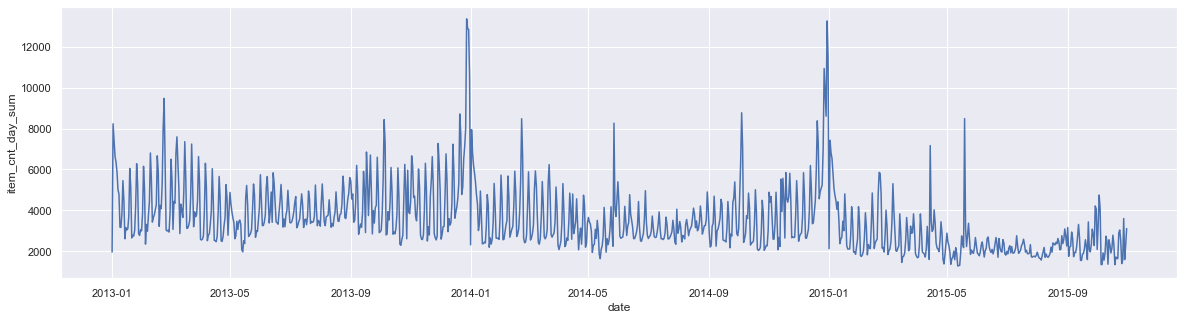

In [162]:
#Plotting
sns.set(style = 'darkgrid')
plt.figure(figsize = (20, 5))
sns.lineplot(x = group_shop['date'], y = group_shop['item_cnt_day_sum'])
plt.title('Trend and Seasonality')

We can see that there is a peak seasonality for every 12 months. Also, we observe a decreasing trend of sales throughout the years.

### 1.8.2 Checking if the Prices Fluctuate

In [163]:
price = matrix.groupby(['item_id']).agg({'shop_item_cnt_month' : ['sum']})
price.columns = ['shop_item_cnt_month_sum']
price

,shop_item_cnt_month_sum
item_id,
0,1.0
1,6.0
2,2.0
3,2.0
4,1.0
...,...
22165,2.0
22166,348.0
22167,1321.0


Get items with total sales more than 16000 to get better results in observing prices if they do fluctuate.

In [175]:
item_id_high = price[price['shop_item_cnt_month_sum'] > 16000]
item_id_high

,shop_item_cnt_month_sum
item_id,
2808,17255.0
3732,16676.0
20949,187660.0


Locate these items in the train data and generate their price plot

In [176]:
item_id_high_list = list(item_id_high.index.values)
train_item_id_high = train.loc[train['item_id'].isin(item_id_high_list)].reset_index(drop=True)
train_item_id_high

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,0,25,2808,999.0,2.0,1998.0
1,2013-01-03,0,25,2808,999.0,2.0,1998.0
2,2013-01-04,0,25,2808,999.0,1.0,999.0
3,2013-01-07,0,25,2808,999.0,1.0,999.0
4,2013-01-08,0,25,2808,999.0,2.0,1998.0
...,...,...,...,...,...,...,...
45289,2015-10-04,33,25,3732,3399.0,1.0,3399.0
45290,2015-10-05,33,25,3732,3399.0,1.0,3399.0
45291,2015-10-17,33,25,3732,3399.0,1.0,3399.0
45292,2015-10-28,33,25,3732,3399.0,1.0,3399.0


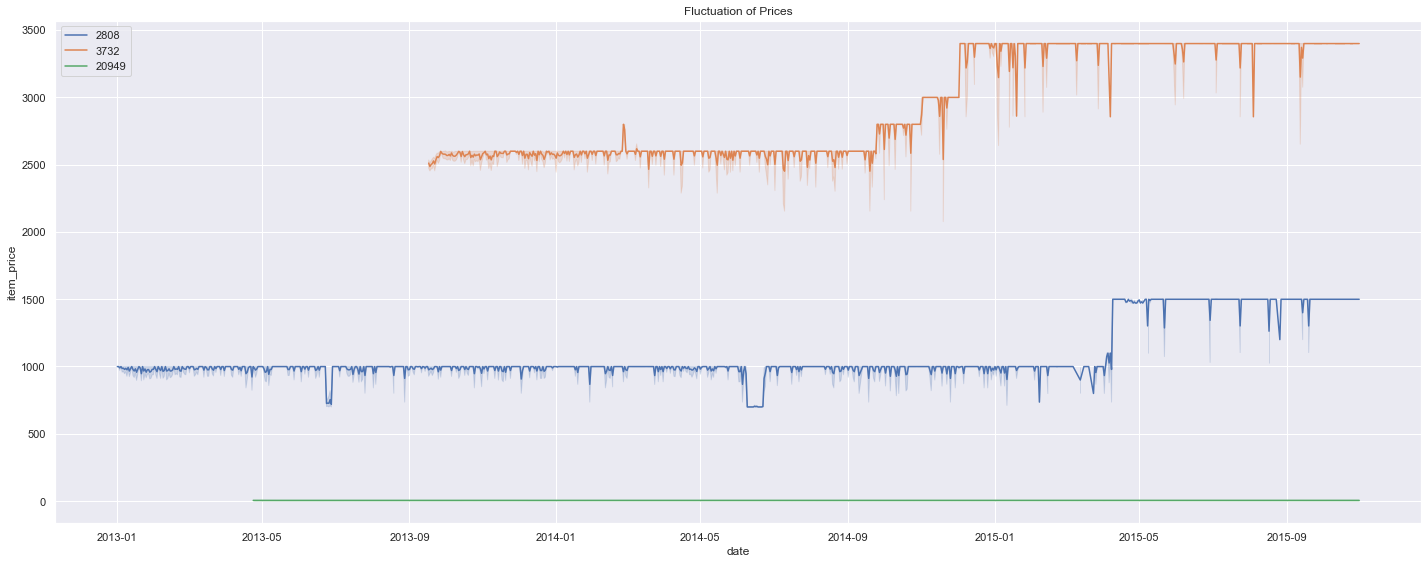

In [178]:
#plotting
sns.set(style = 'darkgrid')
plt.figure(figsize = (20, 8))

for i in item_id_high_list:
    item = train.loc[(train['item_id'] == i)]
    sns.lineplot(x = item['date'], y = item['item_price'], label = i)

plt.title('Fluctuation of Prices')
plt.legend()
plt.tight_layout()

We can see that prices does fluctuate. This will be contained in groupings of revenues.

# 2. Principal Component Analysis

We're going to use PCA to see whether features have any correlation with each other. Our focus is just on the categories with small values so that the plots will be easier to interpret.

In [181]:
#Recheck count of unique values from each category
matrix_u = matrix.nunique()
matrix_u

date_block_num            35
shop_id                   57
item_id                22170
item_category_id          84
name2                    172
name3                   1666
type_id                    8
subtype_id                65
shop_category              5
shop_city                 31
shop_item_cnt_month      441
dtype: int64

Looking at the nmber of unique values, we're going to focus on type_id, shop_category, shop_id, and shop_city.

In [227]:
#inserting shop_item_cnt_month to matrix2
group = matrix[['date_block_num', 'shop_id', 'item_id', 'shop_item_cnt_month']]

matrix2 = pd.merge(matrix2, group, on = ['date_block_num', 'shop_id', 'item_id'], how = 'left')

In [228]:
#checking matrix2 columns
matrix2.head()

,date_block_num,shop_id,item_id,item_category_id,name2,name3,type_code,subtype,type_id,subtype_id,category,city,shop_category,shop_city,shop_item_cnt_month
0,0,2,19,40,4,42,Кино,DVD,3,4,ТЦ,Адыгея,4,0,0.0
1,0,2,27,19,76,42,Игры,PS3,1,10,ТЦ,Адыгея,4,0,1.0
2,0,2,28,30,107,42,Игры,Стандартные издания,1,55,ТЦ,Адыгея,4,0,0.0
3,0,2,29,23,123,42,Игры,XBOX 360,1,16,ТЦ,Адыгея,4,0,0.0
4,0,2,32,40,4,42,Кино,DVD,3,4,ТЦ,Адыгея,4,0,0.0


## 2.1 Grouping to obtain itemtype_cnt_month
item_cnt_month contains how many particular item type is sold each month from all shops (i.e. not paying attention to what shop(s) they're sold from).

In [265]:
tc = time.time()

itemtype_cnt_month = matrix2.groupby(['date_block_num', 'item_id', 'type_code']).agg({'shop_item_cnt_month' : ['sum']})
itemtype_cnt_month.columns = ['itemtype_cnt_month']
itemtype_cnt_month.reset_index(inplace = True)

time.time() - tc

4.329732656478882

In [266]:
itemtype_cnt_month

,date_block_num,item_id,type_code,itemtype_cnt_month
0,0,19,Кино,1.0
1,0,27,Игры,7.0
2,0,28,Игры,8.0
3,0,29,Игры,5.0
4,0,32,Кино,299.0
...,...,...,...,...
239007,34,22162,Кино,0.0
239008,34,22163,Кино,0.0
239009,34,22164,Кино,0.0
239010,34,22166,Книги,0.0


## 2.2 Grouping to obtain shopcat_city_cnt_month
shopcat_city_cnt_month contains how many sales each shop category in a city had each month.

In [364]:
tc = time.time()

shopcat_city_cnt_month = matrix2.groupby(['date_block_num', 'category', 'city']).agg({'shop_item_cnt_month' : ['sum']})
shopcat_city_cnt_month.columns = ['shopcat_city_cnt_month']
shopcat_city_cnt_month.reset_index(inplace = True)

time.time() - tc

5.083519458770752

In [365]:
shopcat_city_cnt_month

,date_block_num,category,city,shopcat_city_cnt_month
0,0,other,Воронеж,3699.0
1,0,other,Жуковский,935.0
2,0,other,Интернет-магазин,881.0
3,0,other,Москва,3424.0
4,0,other,Якутск,5578.0
...,...,...,...,...
1253,34,ТЦ,СергиевПосад,0.0
1254,34,ТЦ,Тюмень,0.0
1255,34,ТЦ,Уфа,0.0
1256,34,ТЦ,Якутск,0.0


## 2.3 Grouping to obtain shop_cnt_month
shop_cnt_month contains how many sales each shop had each month.

In [245]:
tc = time.time()

shop_cnt_month = matrix2.groupby(['date_block_num', 'shop_id', 'category', 'city']).agg({'shop_item_cnt_month' : ['sum']})
shop_cnt_month.columns = ['shop_cnt_month']
shop_cnt_month.reset_index(inplace = True)

time.time() - tc

5.707553148269653

In [246]:
shop_cnt_month

,date_block_num,shop_id,category,city,shop_cnt_month
0,0,2,ТЦ,Адыгея,1151.0
1,0,3,ТРК,Балашиха,767.0
2,0,4,ТЦ,Волжский,2117.0
3,0,6,other,Воронеж,3699.0
4,0,7,ТРЦ,Воронеж,2498.0
...,...,...,...,...,...
1623,34,55,other,Цифровой,0.0
1624,34,56,ТРЦ,Чехов,0.0
1625,34,57,other,Якутск,0.0
1626,34,58,ТЦ,Якутск,0.0


## 2.4 Grouping to obtain shopcity_type_cnt_month
shopcity_type_cnt_month contains item type sales each city had each month.

In [275]:
tc = time.time()

shopcity_type_cnt_month = matrix2.groupby(['date_block_num', 'city', 'type_code']).agg({'shop_item_cnt_month' : ['sum']})
shopcity_type_cnt_month.columns = ['shopcity_type_cnt_month']
shopcity_type_cnt_month.reset_index(inplace = True)

time.time() - tc

5.480511426925659

In [276]:
shopcity_type_cnt_month

,date_block_num,city,type_code,shopcity_type_cnt_month
0,0,Адыгея,others,33.0
1,0,Адыгея,Игры,593.0
2,0,Адыгея,Карты,3.0
3,0,Адыгея,Кино,248.0
4,0,Адыгея,Книги,27.0
...,...,...,...,...
8003,34,Ярославль,Кино,0.0
8004,34,Ярославль,Книги,0.0
8005,34,Ярославль,Музыка,0.0
8006,34,Ярославль,Подарки,0.0


## 2.5 Obtaining shop_item_cnt_month 

In [277]:
shop_item_cnt_month = matrix2[['date_block_num', 'shop_id', 'item_id', 'category', 'city', 'type_code', 'shop_item_cnt_month']]
shop_item_cnt_month

,date_block_num,shop_id,item_id,category,city,type_code,shop_item_cnt_month
0,0,2,19,ТЦ,Адыгея,Кино,0.0
1,0,2,27,ТЦ,Адыгея,Игры,1.0
2,0,2,28,ТЦ,Адыгея,Игры,0.0
3,0,2,29,ТЦ,Адыгея,Игры,0.0
4,0,2,32,ТЦ,Адыгея,Кино,0.0
...,...,...,...,...,...,...,...
11128045,34,45,18454,ТЦ,Самара,Музыка,0.0
11128046,34,45,16188,ТЦ,Самара,Подарки,0.0
11128047,34,45,15757,ТЦ,Самара,Музыка,0.0
11128048,34,45,19648,ТЦ,Самара,Кино,0.0


## 2.6 Obtaining shop-category pair

In [422]:
tc = time.time()

shop_cat_cnt_month = matrix2.groupby(['date_block_num', 'shop_id', 'category']).agg({'shop_item_cnt_month' : ['sum']})
shop_cat_cnt_month.columns = ['shop_cat_cnt_month']
shop_cat_cnt_month.reset_index(inplace = True)

time.time() - tc

3.4318625926971436

In [423]:
shop_cat_cnt_month

,date_block_num,shop_id,category,shop_cat_cnt_month
0,0,2,ТЦ,1151.0
1,0,3,ТРК,767.0
2,0,4,ТЦ,2117.0
3,0,6,other,3699.0
4,0,7,ТРЦ,2498.0
...,...,...,...,...
1623,34,55,other,0.0
1624,34,56,ТРЦ,0.0
1625,34,57,other,0.0
1626,34,58,ТЦ,0.0


## 2.7 Introducing Lag Features

We're going to introduce 34 lag features for all features generated above. Only data with date_block_num == 34 will be used as they won't contain NaN values which isn't handled by PCA.

In [304]:
#define lag feature function
def lag_feature0(df, lags, cols, cols_lag): 
    #cols is the column(s) to be included for plot legend purposes
    #cols_lag is the column the lag feature is based on
    print('starting...')
    tc = time.time()
    
    if (len(cols) == 1):
        for col in cols_lag:
            print(col)
            tmp = df[["date_block_num", cols[0], col]]
            for i in lags:
                shifted = tmp.copy()
                shifted.columns = ["date_block_num", cols[0], col + "_lag_"+str(i)]
                shifted.date_block_num = shifted.date_block_num + i
                df = pd.merge(df, shifted, on=['date_block_num', cols[0]], how='left')
    elif (len(cols) == 2):
        for col in cols_lag:
            print(col)
            tmp = df[["date_block_num", cols[0], cols[1], col]]
            for i in lags:
                shifted = tmp.copy()
                shifted.columns = ["date_block_num", cols[0], cols[1], col + "_lag_"+str(i)]
                shifted.date_block_num = shifted.date_block_num + i
                df = pd.merge(df, shifted, on=['date_block_num', cols[0], cols[1]], how='left')
    elif (len(cols) == 3):
        for col in cols_lag:
            print(col)
            tmp = df[["date_block_num", cols[0], cols[1], cols[2], col]]
            for i in lags:
                shifted = tmp.copy()
                shifted.columns = ["date_block_num", cols[0], cols[1], cols[2], col + "_lag_"+str(i)]
                shifted.date_block_num = shifted.date_block_num + i
                df = pd.merge(df, shifted, on=['date_block_num', cols[0], cols[1], cols[2]], how='left')
    elif (len(cols) == 4):
        for col in cols_lag:
            print(col)
            tmp = df[["date_block_num", cols[0], cols[1], cols[2], cols[3], col]]
            for i in lags:
                shifted = tmp.copy()
                shifted.columns = ["date_block_num", cols[0], cols[1], cols[2], cols[3], col + "_lag_"+str(i)]
                shifted.date_block_num = shifted.date_block_num + i
                df = pd.merge(df, shifted, on=['date_block_num', cols[1], cols[2], cols[3]], how='left')
    else:
        for col in cols_lag:
            print(col)
            tmp = df[["date_block_num", cols[0], cols[1], cols[2], cols[3], cols[4], col]]
            for i in lags:
                shifted = tmp.copy()
                shifted.columns = ["date_block_num", cols[0], cols[1], cols[2], cols[3], cols[4], col + "_lag_"+str(i)]
                shifted.date_block_num = shifted.date_block_num + i
                df = pd.merge(df, shifted, on=['date_block_num', cols[0], cols[1], cols[2], cols[3], cols[4]], how='left')
    print('Done!')
    print('-' * 40)
    print('Time taken: ', time.time() - tc, 's.')
    return df.fillna(0)

### 2.7.1 Lag of itemtype_cnt_month

In [280]:
itemtype_cnt_month.columns

Index(['date_block_num', 'item_id', 'type_code', 'itemtype_cnt_month'], dtype='object')

In [299]:
#lag feature of itemtype_cnt_month
#create copy matrix
m1 = itemtype_cnt_month.copy()

m1_lag = lag_feature0(m1, np.arange(1, 35, 1), ['item_id', 'type_code'], ['itemtype_cnt_month'])
m1_lag = m1_lag[m1_lag['date_block_num'] == 34]
m1_lag

starting...
itemtype_cnt_month
Done!
----------------------------------------
Time taken:  13.310103416442871 s.


,date_block_num,item_id,type_code,itemtype_cnt_month,itemtype_cnt_month_lag_1,itemtype_cnt_month_lag_2,itemtype_cnt_month_lag_3,itemtype_cnt_month_lag_4,itemtype_cnt_month_lag_5,itemtype_cnt_month_lag_6,...,itemtype_cnt_month_lag_25,itemtype_cnt_month_lag_26,itemtype_cnt_month_lag_27,itemtype_cnt_month_lag_28,itemtype_cnt_month_lag_29,itemtype_cnt_month_lag_30,itemtype_cnt_month_lag_31,itemtype_cnt_month_lag_32,itemtype_cnt_month_lag_33,itemtype_cnt_month_lag_34
233912,34,30,Кино,0.0,1.0,3.0,6.0,4.0,4.0,5.0,...,24.0,13.0,19.0,41.0,49.0,50.0,130.0,508.0,862.0,0.0
233913,34,31,Кино,0.0,18.0,9.0,53.0,6.0,10.0,5.0,...,25.0,19.0,25.0,14.0,23.0,32.0,58.0,220.0,628.0,0.0
233914,34,32,Кино,0.0,22.0,19.0,30.0,21.0,26.0,20.0,...,58.0,59.0,72.0,87.0,79.0,66.0,97.0,178.0,208.0,299.0
233915,34,33,Кино,0.0,16.0,17.0,14.0,15.0,11.0,12.0,...,33.0,43.0,36.0,46.0,44.0,12.0,16.0,32.0,40.0,61.0
233916,34,38,Кино,0.0,0.0,3.0,7.0,5.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239007,34,22162,Кино,0.0,10.0,7.0,14.0,27.0,22.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239008,34,22163,Кино,0.0,26.0,20.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239009,34,22164,Кино,0.0,15.0,9.0,20.0,12.0,7.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239010,34,22166,Книги,0.0,11.0,5.0,11.0,8.0,10.0,8.0,...,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.7.2 Lag of shopcat_city_cnt_month

In [366]:
#create copy matrix
m2 = shopcat_city_cnt_month.copy()
m2.columns

Index(['date_block_num', 'category', 'city', 'shopcat_city_cnt_month'], dtype='object')

In [367]:
m2_lag = lag_feature0(m2, np.arange(1, 35, 1), ['category', 'city'], ['shopcat_city_cnt_month'])
m2_lag = m2_lag[m2_lag['date_block_num'] == 34]
m2_lag.head()

starting...
shopcat_city_cnt_month
Done!
----------------------------------------
Time taken:  0.26238489151000977 s.


,date_block_num,category,city,shopcat_city_cnt_month,shopcat_city_cnt_month_lag_1,shopcat_city_cnt_month_lag_2,shopcat_city_cnt_month_lag_3,shopcat_city_cnt_month_lag_4,shopcat_city_cnt_month_lag_5,shopcat_city_cnt_month_lag_6,...,shopcat_city_cnt_month_lag_25,shopcat_city_cnt_month_lag_26,shopcat_city_cnt_month_lag_27,shopcat_city_cnt_month_lag_28,shopcat_city_cnt_month_lag_29,shopcat_city_cnt_month_lag_30,shopcat_city_cnt_month_lag_31,shopcat_city_cnt_month_lag_32,shopcat_city_cnt_month_lag_33,shopcat_city_cnt_month_lag_34
1221,34,other,Воронеж,0.0,1803.0,1728.0,1576.0,1487.0,1546.0,1758.0,...,3685.0,4222.0,3709.0,3368.0,3853.0,3027.0,3174.0,4528.0,4017.0,3699.0
1222,34,other,Жуковский,0.0,428.0,519.0,442.0,449.0,441.0,466.0,...,1013.0,1027.0,755.0,800.0,764.0,683.0,756.0,1017.0,1026.0,935.0
1223,34,other,Интернет-магазин,0.0,4185.0,5229.0,1477.0,1561.0,1836.0,3955.0,...,1924.0,2042.0,1645.0,734.0,1720.0,922.0,1407.0,1431.0,1222.0,881.0
1224,34,other,Москва,0.0,5862.0,3333.0,2667.0,2738.0,2952.0,3078.0,...,4383.0,5017.0,4082.0,3770.0,4169.0,3404.0,4154.0,4829.0,4308.0,3424.0
1225,34,other,Цифровой,0.0,1972.0,6867.0,1976.0,1658.0,1909.0,2117.0,...,916.0,812.0,719.0,795.0,728.0,852.0,0.0,0.0,0.0,0.0


### 2.7.3 Lag of shop_cnt_month

In [306]:
#create copy matrix
m3 = shop_cnt_month.copy()
m3.columns

Index(['date_block_num', 'shop_id', 'category', 'city', 'shop_cnt_month'], dtype='object')

In [307]:
m3_lag = lag_feature0(m3, np.arange(1, 35, 1), ['shop_id', 'category', 'city'], ['shop_cnt_month'])
m3_lag = m3_lag[m3_lag['date_block_num'] == 34]
m3_lag.head()

starting...
shop_cnt_month
Done!
----------------------------------------
Time taken:  0.3199887275695801 s.


,date_block_num,shop_id,category,city,shop_cnt_month,shop_cnt_month_lag_1,shop_cnt_month_lag_2,shop_cnt_month_lag_3,shop_cnt_month_lag_4,shop_cnt_month_lag_5,...,shop_cnt_month_lag_25,shop_cnt_month_lag_26,shop_cnt_month_lag_27,shop_cnt_month_lag_28,shop_cnt_month_lag_29,shop_cnt_month_lag_30,shop_cnt_month_lag_31,shop_cnt_month_lag_32,shop_cnt_month_lag_33,shop_cnt_month_lag_34
1586,34,2,ТЦ,Адыгея,0.0,727.0,825.0,943.0,789.0,807.0,...,798.0,949.0,878.0,809.0,832.0,553.0,585.0,756.0,489.0,1151.0
1587,34,3,ТРК,Балашиха,0.0,616.0,749.0,668.0,542.0,676.0,...,798.0,1031.0,891.0,729.0,789.0,718.0,648.0,959.0,801.0,767.0
1588,34,4,ТЦ,Волжский,0.0,831.0,734.0,948.0,844.0,797.0,...,1486.0,1536.0,1718.0,1384.0,1465.0,1212.0,287.0,2069.0,2036.0,2117.0
1589,34,5,ТРЦ,Вологда,0.0,1054.0,1098.0,1297.0,994.0,955.0,...,1269.0,1299.0,1514.0,1269.0,1395.0,1111.0,1008.0,1357.0,879.0,0.0
1590,34,6,other,Воронеж,0.0,1803.0,1728.0,1576.0,1487.0,1546.0,...,3685.0,4222.0,3709.0,3368.0,3853.0,3027.0,3174.0,4528.0,4017.0,3699.0


### 2.7.4 Lag of shopcity_type_cnt_month

In [308]:
#create copy matrix
m4 = shopcity_type_cnt_month.copy()
m4.columns

Index(['date_block_num', 'city', 'type_code', 'shopcity_type_cnt_month'], dtype='object')

In [309]:
m4_lag = lag_feature0(m4, np.arange(1, 35, 1), ['city', 'type_code'], ['shopcity_type_cnt_month'])
m4_lag = m4_lag[m4_lag['date_block_num'] == 34]
m4_lag.head()

starting...
shopcity_type_cnt_month
Done!
----------------------------------------
Time taken:  0.5384290218353271 s.


,date_block_num,city,type_code,shopcity_type_cnt_month,shopcity_type_cnt_month_lag_1,shopcity_type_cnt_month_lag_2,shopcity_type_cnt_month_lag_3,shopcity_type_cnt_month_lag_4,shopcity_type_cnt_month_lag_5,shopcity_type_cnt_month_lag_6,...,shopcity_type_cnt_month_lag_25,shopcity_type_cnt_month_lag_26,shopcity_type_cnt_month_lag_27,shopcity_type_cnt_month_lag_28,shopcity_type_cnt_month_lag_29,shopcity_type_cnt_month_lag_30,shopcity_type_cnt_month_lag_31,shopcity_type_cnt_month_lag_32,shopcity_type_cnt_month_lag_33,shopcity_type_cnt_month_lag_34
7784,34,Адыгея,others,0.0,9.0,11.0,8.0,8.0,9.0,10.0,...,0.0,0.0,0.0,12.0,19.0,8.0,14.0,17.0,4.0,33.0
7785,34,Адыгея,Игры,0.0,462.0,548.0,625.0,465.0,464.0,556.0,...,592.0,734.0,642.0,540.0,548.0,359.0,405.0,548.0,325.0,593.0
7786,34,Адыгея,Карты,0.0,6.0,10.0,17.0,14.0,13.0,18.0,...,6.0,12.0,15.0,12.0,20.0,11.0,8.0,4.0,3.0,3.0
7787,34,Адыгея,Кино,0.0,131.0,115.0,137.0,111.0,135.0,76.0,...,88.0,99.0,111.0,122.0,125.0,96.0,79.0,92.0,78.0,248.0
7788,34,Адыгея,Книги,0.0,28.0,15.0,13.0,11.0,16.0,23.0,...,13.0,10.0,9.0,18.0,6.0,5.0,15.0,13.0,5.0,27.0


### 2.7.5 Lag of shop-category pair

In [424]:
#create copy matrix
m5 = shop_cat_cnt_month.copy()
m5.columns

Index(['date_block_num', 'shop_id', 'category', 'shop_cat_cnt_month'], dtype='object')

In [425]:
m5_lag = lag_feature0(m5, np.arange(1, 35, 1), ['shop_id', 'category'], ['shop_cat_cnt_month'])
m5_lag = m5_lag[m5_lag['date_block_num'] == 34]
m5_lag

starting...
shop_cat_cnt_month
Done!
----------------------------------------
Time taken:  0.2733032703399658 s.


,date_block_num,shop_id,category,shop_cat_cnt_month,shop_cat_cnt_month_lag_1,shop_cat_cnt_month_lag_2,shop_cat_cnt_month_lag_3,shop_cat_cnt_month_lag_4,shop_cat_cnt_month_lag_5,shop_cat_cnt_month_lag_6,...,shop_cat_cnt_month_lag_25,shop_cat_cnt_month_lag_26,shop_cat_cnt_month_lag_27,shop_cat_cnt_month_lag_28,shop_cat_cnt_month_lag_29,shop_cat_cnt_month_lag_30,shop_cat_cnt_month_lag_31,shop_cat_cnt_month_lag_32,shop_cat_cnt_month_lag_33,shop_cat_cnt_month_lag_34
1586,34,2,ТЦ,0.0,727.0,825.0,943.0,789.0,807.0,846.0,...,798.0,949.0,878.0,809.0,832.0,553.0,585.0,756.0,489.0,1151.0
1587,34,3,ТРК,0.0,616.0,749.0,668.0,542.0,676.0,734.0,...,798.0,1031.0,891.0,729.0,789.0,718.0,648.0,959.0,801.0,767.0
1588,34,4,ТЦ,0.0,831.0,734.0,948.0,844.0,797.0,896.0,...,1486.0,1536.0,1718.0,1384.0,1465.0,1212.0,287.0,2069.0,2036.0,2117.0
1589,34,5,ТРЦ,0.0,1054.0,1098.0,1297.0,994.0,955.0,1013.0,...,1269.0,1299.0,1514.0,1269.0,1395.0,1111.0,1008.0,1357.0,879.0,0.0
1590,34,6,other,0.0,1803.0,1728.0,1576.0,1487.0,1546.0,1758.0,...,3685.0,4222.0,3709.0,3368.0,3853.0,3027.0,3174.0,4528.0,4017.0,3699.0
1591,34,7,ТРЦ,0.0,1216.0,1292.0,1411.0,1327.0,1238.0,1219.0,...,2240.0,2600.0,2399.0,2032.0,2089.0,1648.0,1541.0,2464.0,2516.0,2498.0
1592,34,11,other,0.0,428.0,519.0,442.0,449.0,441.0,466.0,...,1013.0,1027.0,755.0,800.0,764.0,683.0,756.0,1017.0,1026.0,935.0
1593,34,12,other,0.0,4185.0,5229.0,1477.0,1561.0,1836.0,3955.0,...,1924.0,2042.0,1645.0,734.0,1720.0,922.0,1407.0,1431.0,1222.0,881.0
1594,34,14,ТЦ,0.0,1007.0,1097.0,1063.0,957.0,1020.0,937.0,...,1535.0,796.0,2218.0,1712.0,1865.0,1495.0,1251.0,1896.0,1799.0,1779.0
1595,34,15,ТРЦ,0.0,1248.0,1269.0,1361.0,1318.0,1332.0,1281.0,...,2614.0,2799.0,2542.0,2604.0,2425.0,1933.0,2169.0,2840.0,2756.0,2730.0
